In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('per-capita-energy-source-stacked.csv',delimiter=',')
df2 =pd.read_csv('energy.csv')
#df = df.query('Year == 2021')
#df2 = df2.query('Year == 2021')
df3 =pd.merge(df,df2,how='left',on=('Entity','Code','Year'))
df3

,Entity,Code,Year,Fossil fuels per capita (kWh),Nuclear per capita (kWh - equivalent),Renewables per capita (kWh - equivalent),Carbon intensity of electricity (gCO2/kWh)
0,Africa,NaN,1965,2106.226318,0.000000,128.437164,NaN
1,Africa,NaN,1966,2142.466309,0.000000,139.716644,NaN
2,Africa,NaN,1967,2106.051270,0.000000,142.219559,NaN
3,Africa,NaN,1968,2153.038086,0.000000,162.188400,NaN
4,Africa,NaN,1969,2134.460938,0.000000,184.498459,NaN
...,...,...,...,...,...,...,...
4863,World,OWID_WRL,2017,17593.189453,892.252136,2368.126953,447.112701
4864,World,OWID_WRL,2018,17811.734375,898.433167,2489.007812,443.927032
4865,World,OWID_WRL,2019,17648.564453,917.006226,2588.878662,435.212341
4866,World,OWID_WRL,2020,16523.912109,871.005188,2704.402100,421.854004


In [5]:
df3 = df3.rename(columns = {'Fossil fuels per capita (kWh)':'Fossil','Nuclear per capita (kWh - equivalent)':'Nuclear','Renewables per capita (kWh - equivalent)':'Renewables','Carbon intensity of electricity (gCO2/kWh)':'Carbon Intensity'})

df3

,Entity,Code,Year,Fossil,Nuclear,Renewables,Carbon Intensity
0,Africa,NaN,1965,2106.226318,0.000000,128.437164,NaN
1,Africa,NaN,1966,2142.466309,0.000000,139.716644,NaN
2,Africa,NaN,1967,2106.051270,0.000000,142.219559,NaN
3,Africa,NaN,1968,2153.038086,0.000000,162.188400,NaN
4,Africa,NaN,1969,2134.460938,0.000000,184.498459,NaN
...,...,...,...,...,...,...,...
4863,World,OWID_WRL,2017,17593.189453,892.252136,2368.126953,447.112701
4864,World,OWID_WRL,2018,17811.734375,898.433167,2489.007812,443.927032
4865,World,OWID_WRL,2019,17648.564453,917.006226,2588.878662,435.212341
4866,World,OWID_WRL,2020,16523.912109,871.005188,2704.402100,421.854004


<AxesSubplot:>

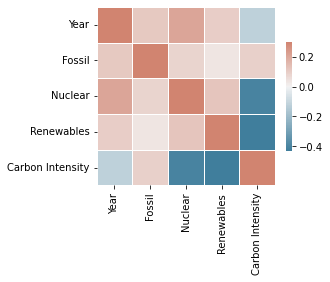

In [6]:
corr = df3.corr()
corr
f, ax = plt.subplots(figsize=(4, 4))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
df2021 = df3.query('Year == 2021 & Nuclear > 0')


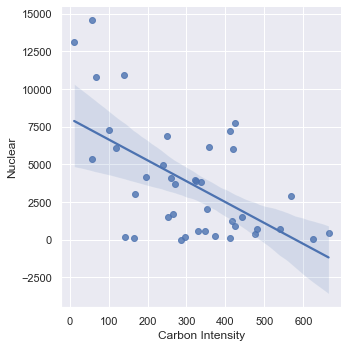

In [8]:
sns.set_theme(style="darkgrid")
sns.lmplot(data=df2021, x="Carbon Intensity", y="Nuclear")


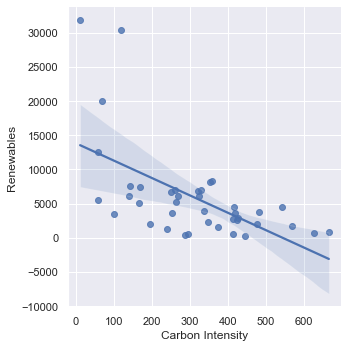

In [9]:
sns.lmplot(data=df2021, x="Carbon Intensity", y="Renewables")


In [10]:
df2021['RenewablesAC'] = df2021['Renewables'] + df2021['Nuclear']
df2021['FossilAC'] = df2021['Fossil'] + df2021['Renewables'] + df2021['Nuclear']
df2021 = df2021.sort_values('Nuclear',ascending=False)

/var/folders/_q/0n36tt991g9byyt7nwhjh8_h0000gn/T/ipykernel_1374/2199320031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['RenewablesAC'] = df2021['Renewables'] + df2021['Nuclear']
/var/folders/_q/0n36tt991g9byyt7nwhjh8_h0000gn/T/ipykernel_1374/2199320031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['FossilAC'] = df2021['Fossil'] + df2021['Renewables'] + df2021['Nuclear']


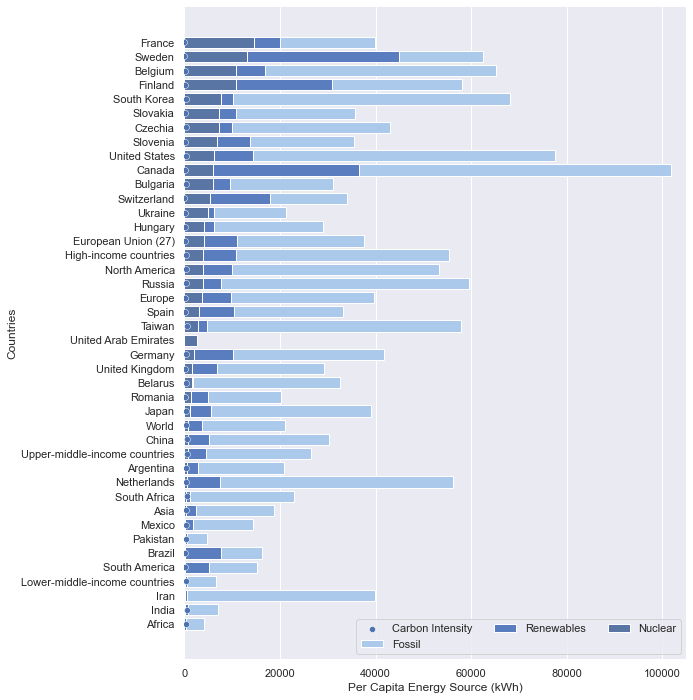

In [11]:

f, ax = plt.subplots(figsize=(9, 12))
sns.set_color_codes('pastel')
sns.barplot(x="FossilAC", y="Entity", data=df2021,label="Fossil", color="b")
sns.set_color_codes("muted")
sns.barplot(x="RenewablesAC", y="Entity", data=df2021,label="Renewables", color="b")
sns.set_color_codes("deep")
sns.barplot(x="Nuclear", y="Entity", data=df2021,label="Nuclear", color="b")
sns.scatterplot(x="Carbon Intensity", y='Entity', data=df2021,label='Carbon Intensity',)
ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlim=(0, 105000), ylabel="Countries",xlabel="Per Capita Energy Source (kWh)")
sns.despine(left=True, bottom=True)

In [12]:
from sklearn.linear_model import LinearRegression

df3 = df3.dropna()
X = df3.drop(['Entity','Code','Year','Carbon Intensity'], axis=1)
Y = df3['Carbon Intensity']
model = LinearRegression()
model.fit(X,Y)
r_sq = model.score(X,Y)
print(f"el R2 es  {r_sq}")
print(f"el intercepto es {model.intercept_}")
print(f"los coeficientes son {model.coef_}")



el R2 es  0.3468127148785126
el intercepto es 458.26363057813774
los coeficientes son [ 0.00045075 -0.01926224 -0.00487036]


In [22]:
X['Fossil_rel'] = X['Fossil'] / (X['Fossil'] + X["Nuclear"] + X['Renewables'])
X['Nuclear_rel'] = X['Nuclear'] / (X['Fossil'] + X["Nuclear"] + X['Renewables'])
X['Renewables_rel'] = X['Renewables'] / (X['Fossil'] + X["Nuclear"] + X['Renewables'])

X1 = X.drop(['Fossil','Nuclear', 'Renewables'], axis=1)
model2 = LinearRegression()
model2.fit(X1,Y)
r_sq2 = model2.score(X1,Y)
print(f"el R2 es  {r_sq2}")
print(f"el intercepto es {model2.intercept_}")
print(f"los coeficientes son {model2.coef_}")
X1

el R2 es  0.5921663279021866
el intercepto es -75.14880117070646
los coeficientes son [ 636.8252528  -361.59147299 -275.23377982]


,Fossil_rel,Nuclear_rel,Renewables_rel
92,0.999468,0.000000,0.000532
93,0.999348,0.000000,0.000652
94,0.999483,0.000000,0.000517
95,0.997719,0.000000,0.002281
96,0.997932,0.000000,0.002068
...,...,...,...
4863,0.843654,0.042787,0.113560
4864,0.840209,0.042381,0.117411
4865,0.834272,0.043348,0.122380
4866,0.822113,0.043335,0.134552
